<a href="https://colab.research.google.com/github/enaskopelja/fast_fourier_transform/blob/master/FFT_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Audio
from scipy.io import wavfile
from io import BytesIO

## Generating a Signal
a 5 sec tone of equal parts C (\~261 Hz) and A (\~ 554 Hz) is generated.


In [ ]:
samp_freq = 8000
t = np.arange(0, 5, step=1. / samp_freq)

x1 = np.sin(2 * np.pi * 261 * t) 
x2 = np.sin(2 * np.pi * 554 * t)

x = x1 + x2
x = (x - np.mean(x))/np.std(x)

# Plotting
# f, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 10))
# ax1[0].plot(t, x1, c='blue')
# ax1[1].plot(t, x2, c='red')
# ax2[0].plot(t, x2, c='red')
# ax2[0].plot(t, x1, c='blue')
# ax2[1].plot(t, x, c = 'purple')

# ax1[0].set_xlim(0, .01)
# ax1[1].set_xlim(0, .01)
# ax2[0].set_xlim(0, .01)
# ax2[1].set_xlim(0, .01)

In [ ]:
Audio(x, rate=samp_freq)

## Frequency Analysis of the Signal



`np.fft.fft` - numpy's implementation of the **Fast Fourier Transform** (FFT) algorithm

_input_ : a time-domain signal of length $N$ 

_output_: a frequency-domain signal of length $N$. 
- The first $\frac{N}{2}$ samples in the frequency domain represent the DFT values at equally spaced _positive_ frequencies in $[0, samp\_freq/ 2)$.
- The last $\frac{N}{2}$ samples represent the DFT values at equally spaced _negative_ frequencies in $[- samp\_freq/ 2, 0)$.

If the time-domain signal is real-valued, then the DFT values at negative frequencies will be the complex conjugates of the DFT values at positive frequencies. So all of the information is contained in the first half of the DFT for a real-valued signal.

In [ ]:
X = np.fft.fft(x)
print(X)

[-1.03317850e-12+0.00000000e+00j -5.53757342e-12-1.47086935e-11j
  1.90436532e-11-1.55786772e-11j ...  2.42370699e-11-2.69924256e-11j
  1.89772008e-11+1.55911884e-11j -5.55226481e-12+1.47019768e-11j]


Since the values of the DFT are complex numbers, we examine the magnitude or the power (magnitude squared) of these numbers.

Text(0.5, 0, 'Raw np.fft output (Hz)')

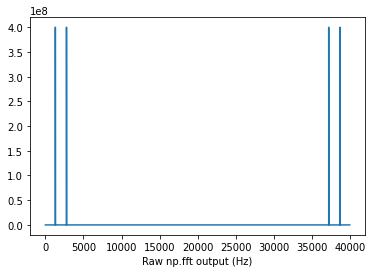

In [ ]:
X_pow = np.abs(X) ** 2
plt.plot(X_pow)
plt.xlabel("Raw np.fft output (Hz)")

Text(0.5, 0, 'Frequency (Hz)')

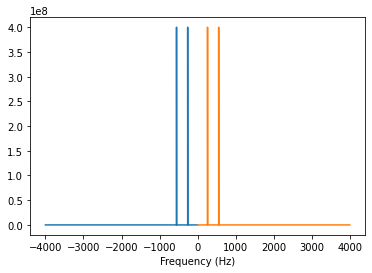

In [ ]:
N = len(x)

f_neg = np.arange(-samp_freq / 2, 0, step=samp_freq / N)
f_pos = np.arange(0, samp_freq / 2, step=samp_freq / N)

plt.plot(f_neg, X_pow[(N // 2):])
plt.plot(f_pos, X_pow[:(N // 2)])

plt.xlabel("Frequency (Hz)")

## Designing the Filter

The aim is to keep the 261 Hz sinusoid, and remove the 554 Hz sinusoid.

Filter with a cutoff frequency of 400 Hz:

(-0.1, 1.1)

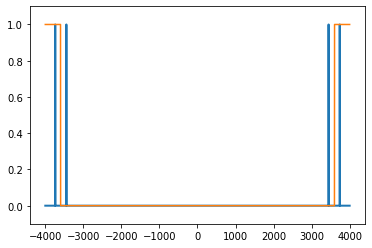

In [ ]:
filter = np.concatenate([1. * (f_pos <= 400), 1. * (f_neg >= -400)]) 
f = np.arange(-samp_freq/2, samp_freq/2, samp_freq / N)

plt.plot(f, X_pow*2.5e-9,linewidth=2)
plt.plot(f, filter)
plt.ylim(-.1, 1.1)

## Applying the filter

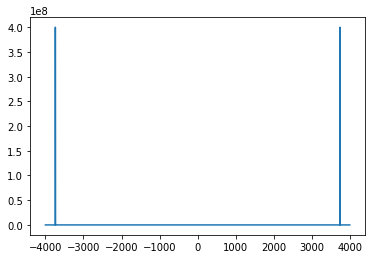

In [ ]:
filtered_signal_freq = X_pow*filter 
plt.plot(f, X_pow*filter)

Inverse fft:

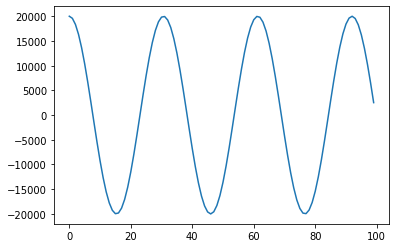

In [ ]:
filtered_signal_time = np.real(np.fft.ifft(filtered_signal_freq)) 
plt.plot(filtered_signal_time[:100])

In [ ]:
Audio(filtered_signal_time, rate = samp_freq)